In [97]:
# Veri işleme
import pandas as pd
import numpy as np

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Makine öğrenmesi modelleri ve ön işleme
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Uyarıları kapat
import warnings
warnings.filterwarnings('ignore')

In [98]:
# Veriyi yükle
df = pd.read_csv('train.csv')

In [99]:
#Veri seti bilgisi
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [100]:
#İstatistiksel Özet
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [101]:
#Eksik veri kontrolü
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [102]:
#Gereksiz sütunları atalım
df.drop(['Name','Ticket','Cabin','PassengerId'], axis=1, inplace=True)

In [103]:
#Eksik verileri dolduralım
df['Age'].fillna(df['Age'].median(), inplace=True) #Yaşı medyan ile doldurur 

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #Embarked'ı mod ile doldurur


In [104]:
#Cinsiyeti sayısal yapalım (Label Encoding)
df['Sex'] = df['Sex'].map({'male':0, 'female':1})

In [105]:
#Embarked'ı One-Hot Encoding yapalım
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [106]:
print("Veri artık hazır!")
print(df.head())

Veri artık hazır!
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


In [107]:
#MODEL İÇİN VERİYİ AYIRALIM


In [108]:
#Özellikler (X) ve Hedef (y)
X= df.drop('Survived', axis=1)
y= df['Survived']

In [109]:
#Eğitim ve test setlerine ayıralım (%80 Eğitim, %20 Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (f"Eğitim seti: {X_train.shape}")
print (f"Test seti: {X_test.shape}")


Eğitim seti: (712, 8)
Test seti: (179, 8)


In [110]:
#Ölçeklendirme
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
#MODELİ EĞİTELİM

In [112]:
#Random Forest Modeli Oluşturalım
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

#Modeli Eğitelim
model.fit(X_train_scaled, y_train)

#Tahmin yapalım
y_pred = model.predict(X_test_scaled)

Model Doğruluğu: 0.82


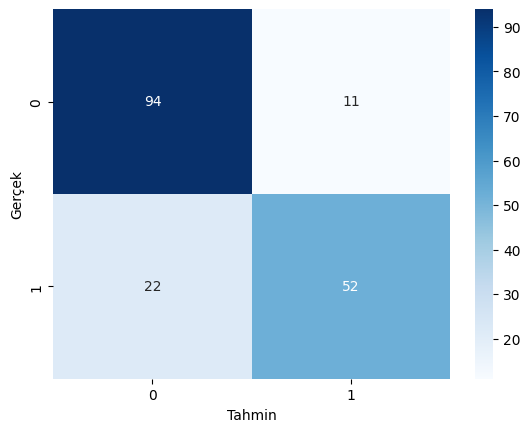

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [113]:
# Doğruluk skoru
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Doğruluğu: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Tahmin')
plt.ylabel('Gerçek')
plt.show()

# Detaylı rapor
print(classification_report(y_test, y_pred))

      feature  importance
1         Sex    0.459621
5        Fare    0.177806
0      Pclass    0.127118
2         Age    0.111560
3       SibSp    0.050670
4       Parch    0.037384
7  Embarked_S    0.026977
6  Embarked_Q    0.008864


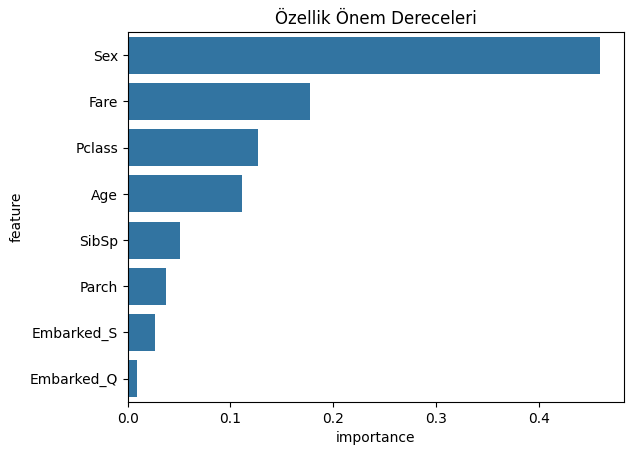

In [114]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print(feature_importance)

# Görselleştir
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Özellik Önem Dereceleri')
plt.show()